# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes              | RM             | Turma   |
| :-----------------------          | :------------- | :-----: |
| Eduardo Rodrigo Ferreira          | RM 335756      | `10IA`  |
| Josenilton Sergio Silva Fernandes | RM 335527      | `10IA`  |
| Leandro Queiroz Santos Silva      | RM 335535      | `10IA`  |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**: ```1490``` imagens para cada classe

In [ ]:
!echo "Quantidade de imagens bacteria" && find /content/fiap-ml-visao-computacional-capstone-alternative/projeto-final/raiox/bacteria/*.jpeg -ls | wc -l

1491


In [ ]:
!echo "Quantidade de imagens controle" && find /content/fiap-ml-visao-computacional-capstone-alternative/projeto-final/raiox/controle/*.jpeg -ls | wc -l

1491


In [ ]:
!echo "Quantidade de imagens viral" && find /content/fiap-ml-visao-computacional-capstone-alternative/projeto-final/raiox/viral/*.jpeg -ls | wc -l

1491


## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [ ]:
## IMPLEMENTE
divisao_treino_validacao = 0.25

In [ ]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 3354 images belonging to 3 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    "raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 1116 images belonging to 3 classes.


In [ ]:
train_generator.class_indices, val_generator.class_indices

({'bacteria': 0, 'controle': 1, 'viral': 2},
 {'bacteria': 0, 'controle': 1, 'viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [ ]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

A arquitetura do ResNet50 possui 4 estágios. A rede pode pegar a imagem de entrada com altura, largura de múltiplos de 32 e 3 como largura de canal. Para fins de explicação, consideraremos o tamanho da entrada como 224 x 224 x 3. Toda arquitetura ResNet executa a convolução inicial e o pool máximo usando os tamanhos de kernel 7 × 7 e 3 × 3, respectivamente. Posteriormente, o estágio 1 da rede é iniciado e possui 3 blocos residuais contendo 3 camadas cada. O tamanho dos núcleos usados ​​para executar a operação de convolução nas três camadas do bloco do estágio 1 são 64, 64 e 128, respectivamente. As setas curvas se referem à conexão de identidade. A seta conectada tracejada representa que a operação de convolução no bloco residual é realizada com passo 2, portanto, o tamanho da entrada será reduzido à metade em termos de altura e largura, mas a largura do canal será duplicada. À medida que progredimos de um estágio para outro.

Para redes mais profundas, como ResNet50, ResNet152, etc, é usado o design de gargalo. Para cada função residual F, três camadas são empilhadas uma sobre a outra. As três camadas são convoluções 1 × 1, 3 × 3, 1 × 1 . As camadas de convolução 1 × 1 são responsáveis ​​por reduzir e restaurar as dimensões. A camada 3 × 3 é deixada como um gargalo com dimensões menores de entrada / saída.

Por fim, a rede possui uma camada Average Pooling seguida por uma camada totalmente conectada com 1000 neurônios (saída da classe ImageNet).

<p align="center">
    <img src="imagens/ResNet50.png">
</p>

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [ ]:
## IMPLEMENTE
qtde_classes = 3

In [ ]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [ ]:
## IMPLEMENTE
qtde_epocas = 20

In [ ]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/20
5/5 [==============================] - 12s 2s/step - loss: 1.1701 - precision_score: 0.4250 - recall_score: 0.3562 - f1_score: 0.3873 - val_loss: 0.8773 - val_precision_score: 0.5126 - val_recall_score: 0.4313 - val_f1_score: 0.4681
Epoch 2/20
5/5 [==============================] - 10s 2s/step - loss: 0.7754 - precision_score: 0.7197 - recall_score: 0.6250 - f1_score: 0.6688 - val_loss: 1.0007 - val_precision_score: 0.5670 - val_recall_score: 0.5063 - val_f1_score: 0.5345
Epoch 3/20
5/5 [==============================] - 9s 2s/step - loss: 0.7314 - precision_score: 0.7151 - recall_score: 0.6438 - f1_score: 0.6770 - val_loss: 1.1112 - val_precision_score: 0.5921 - val_recall_score: 0.5063 - val_f1_score: 0.5453
Epoch 4/20
5/5 [==============================] - 10s 2s/step - loss: 0.6430 - precision_score: 0.7925 - recall_score: 0.7250 - f1_score: 0.7566 - val_loss: 0.6830 - val_precision_score: 0.7220 - val_recall_score: 0.6438 - val_f1_score: 0.6801
Epoch 5/20
5/5 [=========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

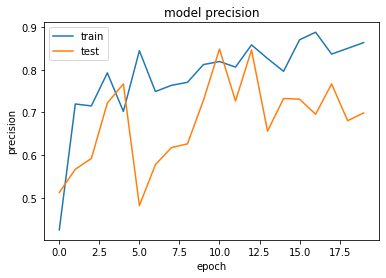

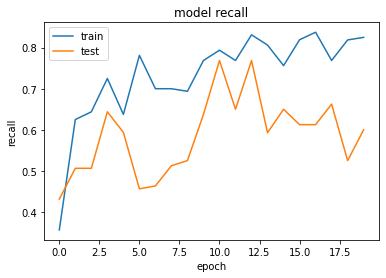

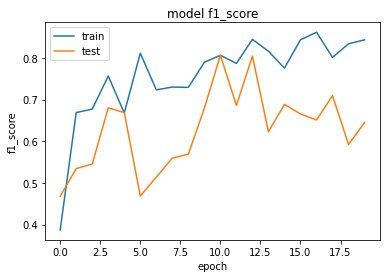

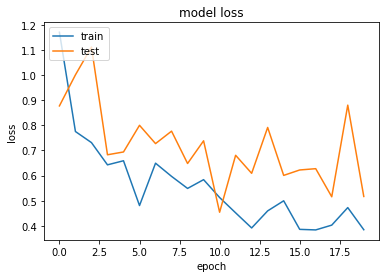

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:


Com o ResNet50, podemos observar que no gráfico de perda (loss), tanto para treino como para teste, estão com a tendência de serem decrecentes e os gráficos de precisão (precision), de sensibilidade (recall) e de pontuação f1 (f1_score), tanto no treino como no teste, estão com a tendência de serem crescentes, acreditamos que o medelo está convergindo bem com os dados e o modelo.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: O valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 63,68%, 63,68%, 63,68%

2500 imagens -> 0.25 split -> 2 classes ```Epoch 10/10 [==============================] - 43s 9s/step - loss: 0.1767 - precision_score: 0.9375 - recall_score: 0.9375 - f1_score: 0.9375 - val_loss: 0.7949 - val_precision_score: 0.6368 - val_recall_score: 0.6368 - val_f1_score: 0.6368```

1490 imagens -> 0.25 split -> 3 classes ```Epoch 10/10 [==============================] - 41s 8s/step - loss: 0.5896 - precision_score: 0.7717 - recall_score: 0.7375 - f1_score: 0.7541 - val_loss: 0.8978 - val_precision_score: 0.5075 - val_recall_score: 0.4437 - val_f1_score: 0.4734```

1490 imagens -> 0.30 split -> 3 classes ```Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.6021 - precision_score: 0.8333 - recall_score: 0.7500 - f1_score: 0.7894 - val_loss: 0.8663 - val_precision_score: 0.4261 - val_recall_score: 0.3625 - val_f1_score: 0.3917```

1000 imagens -> 0.25 split -> 3 classes ```Epoch 10/10 [==============================] - 46s 9s/step - loss: 0.5418 - precision_score: 0.8150 - recall_score: 0.7688 - f1_score: 0.7911 - val_loss: 1.2037 - val_precision_score: 0.5998 - val_recall_score: 0.5786 - val_f1_score: 0.5889```

1000 imagens -> 0.30 split -> 3 classes ```Epoch 10/10 [==============================] - 44s 9s/step - loss: 0.6114 - precision_score: 0.7754 - recall_score: 0.7375 - f1_score: 0.7555 - val_loss: 0.9359 - val_precision_score: 0.3896 - val_recall_score: 0.3812 - val_f1_score: 0.3853```

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

Essa rede é caracterizada por sua simplicidade, usando apenas camadas convolucionais 3 × 3 empilhadas umas sobre as outras em profundidade crescente. A redução do tamanho do volume é realizada pelo pool máximo. Duas camadas totalmente conectadas, cada uma com 4.096 nós são seguidas por um classificador softmax.

<p align="center">
    <img src="imagens/vgg16.png">
</p>

Infelizmente, existem duas desvantagens principais com a VGGNet:



*   É dolorosamente lento para treinar.
*   Os pesos da arquitetura de rede são bastante grandes (em termos de largura de disco / banda).



In [ ]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/20
5/5 [==============================] - 11s 2s/step - loss: 6.8588 - precision_score: 0.3846 - recall_score: 0.3630 - f1_score: 0.3727 - val_loss: 5.7991 - val_precision_score: 0.3187 - val_recall_score: 0.3187 - val_f1_score: 0.3187
Epoch 2/20
5/5 [==============================] - 10s 2s/step - loss: 2.9176 - precision_score: 0.3989 - recall_score: 0.3938 - f1_score: 0.3962 - val_loss: 1.5002 - val_precision_score: 0.5786 - val_recall_score: 0.5437 - val_f1_score: 0.5604
Epoch 3/20
5/5 [==============================] - 10s 2s/step - loss: 1.6407 - precision_score: 0.6253 - recall_score: 0.6125 - f1_score: 0.6187 - val_loss: 1.7691 - val_precision_score: 0.5833 - val_recall_score: 0.5688 - val_f1_score: 0.5759
Epoch 4/20
5/5 [==============================] - 10s 2s/step - loss: 1.3024 - precision_score: 0.5844 - recall_score: 0.5750 - f1_score: 0.5796 - val_loss: 1.4877 - val_precision_score: 0.5258 - val_recall_score: 0.5125 - val_f1_score: 0.5190
Epoch 5/20
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

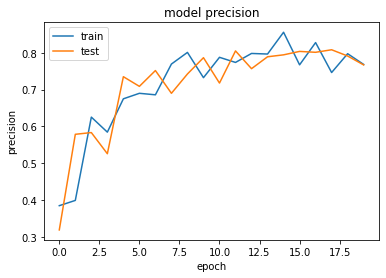

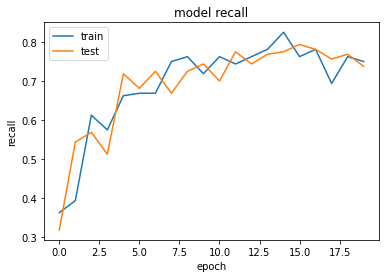

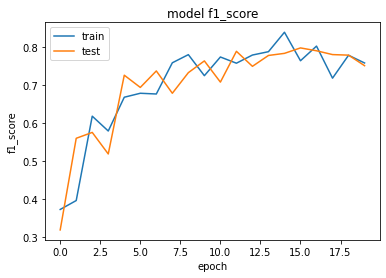

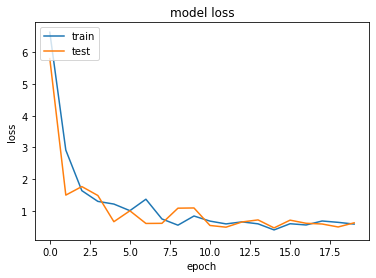

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

Com o VGG16, podemos observar que no gráfico de perda (loss), tanto para treino como para teste, estão com a tendência de serem decrescentes e os gráficos de precisão (precision), de sensibilidade (recall) e de pontuação f1(f1_score), tanto no treino como no teste, estão com a tendência de serem crescentes, acreditamos que o medelo está convergindo bem com os dados e o modelo.


**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 


**Resposta**: O valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49%, 62,16%

2500 imagens -> 0.25 split -> 2 classes ```Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

1490 NOVO -> 0.25 split -> 3 classes ```Epoch 10/10 [==============================] - 61s 12s/step - loss: 0.5527 - precision_score: 0.7742 - recall_score: 0.7500 - f1_score: 0.7619 - val_loss: 0.9563 - val_precision_score: 0.6553 - val_recall_score: 0.6187 - val_f1_score: 0.6364```

1490 NOVO -> 0.30 split -> 3 classes ```Epoch 10/10 [==============================] - 68s 14s/step - loss: 0.6209 - precision_score: 0.8165 - recall_score: 0.8062 - f1_score: 0.8113 - val_loss: 0.5929 - val_precision_score: 0.7345 - val_recall_score: 0.7250 - val_f1_score: 0.7297```

1000 NOVO -> 0.25 split -> 3 classes ```Epoch 10/10 [==============================] - 67s 13s/step - loss: 0.5734 - precision_score: 0.7697 - recall_score: 0.7500 - f1_score: 0.7596 - val_loss: 0.4463 - val_precision_score: 0.7135 - val_recall_score: 0.7036 - val_f1_score: 0.7084```

1000 NOVO -> 0.30 split -> 3 classes ```Epoch 10/10 [==============================] - 70s 14s/step - loss: 1.0538 - precision_score: 0.6986 - recall_score: 0.6812 - f1_score: 0.6897 - val_loss: 0.5713 - val_precision_score: 0.7345 - val_recall_score: 0.7250 - val_f1_score: 0.7297```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

O VGG19 é um modelo de arquitetura semelhante ao VGG16, com três camadas convolucionais adicionais; consiste em um total de 16 camadas de convolução e três camadas densas. A seguir, é apresentada a arquitetura do modelo VGG19. Nas redes VGG, o uso de convoluções 3 x 3 com o passo 1 fornece um efetivo receptor arquivado equivalente a 7 * 7. Isso significa que há menos parâmetros para treinar. Ela aprende a combinar informações de alto nível com informações finas e de baixo nível usando pulos da terceira e quarta camada de pool. As camadas ocultas são equipadas com unidades lineares retificadas (ReLUs) e o número de canais para as camadas convolucionais aumenta com a profundidade da rede. Durante o treinamento, a imagem de entrada possui um tamanho fixo de 224 × 224 pixels, enquanto os campos receptivos para todos os filtros são de 3 × 3 pixels em toda a rede. Essa configuração permite que a FCN (Fully Convolutional Networks) aprenda aproximadamente 140 milhões de parâmetros. A previsão é realizada usando camadas de upsampling com quatro canais para todas as classes nos dados de referência. As camadas de upsampling são fundidas com convoluções 1 × 1 da terceira e quarta camadas de pool com a mesma dimensão de canal.

<p align="center">
    <img src="imagens/vgg19.png">
</p>

In [ ]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/20
5/5 [==============================] - 14s 3s/step - loss: 3.0764 - precision_score: 0.3555 - recall_score: 0.3375 - f1_score: 0.3461 - val_loss: 2.0610 - val_precision_score: 0.4327 - val_recall_score: 0.4187 - val_f1_score: 0.4254
Epoch 2/20
5/5 [==============================] - 13s 3s/step - loss: 1.4953 - precision_score: 0.5320 - recall_score: 0.5125 - f1_score: 0.5221 - val_loss: 1.4516 - val_precision_score: 0.6341 - val_recall_score: 0.6062 - val_f1_score: 0.6197
Epoch 3/20
5/5 [==============================] - 13s 3s/step - loss: 1.1257 - precision_score: 0.6430 - recall_score: 0.6187 - f1_score: 0.6306 - val_loss: 0.9277 - val_precision_score: 0.7630 - val_recall_score: 0.7437 - val_f1_score: 0.7532
Epoch 4/20
5/5 [==============================] - 13s 3s/step - loss: 1.1519 - precision_score: 0.6254 - recall_score: 0.6125 - f1_score: 0.6188 - val_loss: 1.2351 - val_precision_score: 0.5954 - val_recall_score: 0.5875 - val_f1_score: 0.5914
Epoch 5/20
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

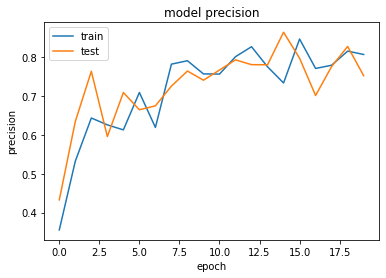

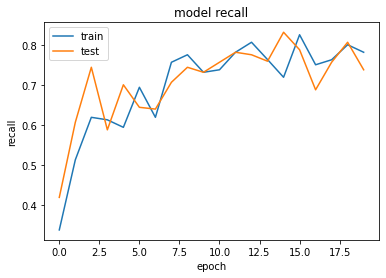

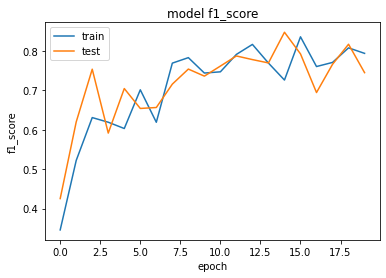

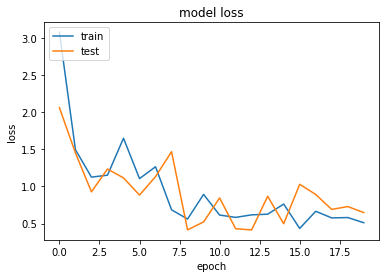

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

Com o VGG19, podemos observar que no gráfico de perda (loss), tanto para treino como para teste, estão com a tendência de serem decrescentes e os gráficos de precisão (precision), de sensibilidade (recall) e de pontuação f1(f1_score), tanto no treino como no teste, estão com a tendência de serem crescentes, acreditamos que o medelo está convergindo bem com os dados e o modelo.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 



**Resposta**: O valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 63,68%, 63,68%, 63,68%

ANTIGO -> 0.25 split -> 2 classes ```Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

1490 NOVO -> 0.25 split -> 3 classes ```Epoch 10/10 [==============================] - 85s 17s/step - loss: 0.5781 - precision_score: 0.7851 - recall_score: 0.7750 - f1_score: 0.7800 - val_loss: 0.8631 - val_precision_score: 0.7469 - val_recall_score: 0.7250 - val_f1_score: 0.7355```

1490 NOVO -> 0.30 split -> 3 classes ```Epoch 10/10 [==============================] - 83s 17s/step - loss: 0.6114 - precision_score: 0.7689 - recall_score: 0.7500 - f1_score: 0.7592 - val_loss: 0.8826 - val_precision_score: 0.7175 - val_recall_score: 0.7125 - val_f1_score: 0.7150```

1000 NOVO -> 0.25 split -> 3 classes ```Epoch 10/10 [==============================] - 76s 15s/step - loss: 0.7469 - precision_score: 0.7450 - recall_score: 0.7400 - f1_score: 0.7425 - val_loss: 0.3582 - val_precision_score: 0.8194 - val_recall_score: 0.7991 - val_f1_score: 0.8089```

1000 NOVO -> 0.30 split -> 3 classes ```Epoch 10/10 [==============================] - 91s 18s/step - loss: 0.7745 - precision_score: 0.7016 - recall_score: 0.6750 - f1_score: 0.6879 - val_loss: 0.3762 - val_precision_score: 0.7901 - val_recall_score: 0.7750 - val_f1_score: 0.7824```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | XX %     | XX %          | XX %     |
| VGG16    | XX %     | XX %          | XX %     |
| VGG19    | XX %     | XX %          | XX %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**:

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [ ]:
#IMPLEMENTE

In [ ]:
# imports
import keras

from keras.applications import ResNet50V2
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

In [ ]:
## IMPLEMENTE
divisao_treino_validacao = 0.25

In [ ]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 3354 images belonging to 3 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    "raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 1116 images belonging to 3 classes.


In [ ]:
conv_base = ResNet50V2(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

94674944/94668760 [==============================] - 1s 0us/step


In [ ]:
## IMPLEMENTE

qtde_classes = 3

In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
## IMPLEMENTE

qtde_epocas = 20

In [ ]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/20
5/5 [==============================] - 12s 2s/step - loss: 1.0526 - precision_score: 0.5703 - recall_score: 0.3625 - f1_score: 0.4384 - val_loss: 27.9349 - val_precision_score: 0.4062 - val_recall_score: 0.4062 - val_f1_score: 0.4062
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 0.7002 - precision_score: 0.7889 - recall_score: 0.6562 - f1_score: 0.7153 - val_loss: 84.0490 - val_precision_score: 0.3562 - val_recall_score: 0.3562 - val_f1_score: 0.3562
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.5154 - precision_score: 0.8062 - recall_score: 0.7188 - f1_score: 0.7589 - val_loss: 87.0654 - val_precision_score: 0.3187 - val_recall_score: 0.3187 - val_f1_score: 0.3187
Epoch 4/20
5/5 [==============================] - 11s 2s/step - loss: 0.4914 - precision_score: 0.8371 - recall_score: 0.7750 - f1_score: 0.8046 - val_loss: 132.3243 - val_precision_score: 0.3125 - val_recall_score: 0.3125 - val_f1_score: 0.3125
Epoch 5/20
5/5 [=====

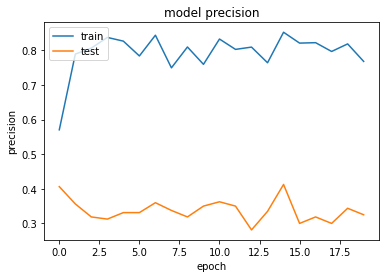

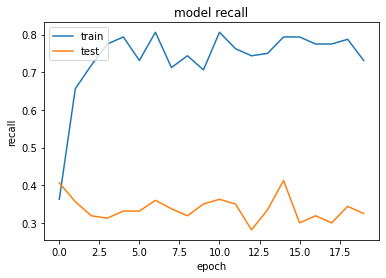

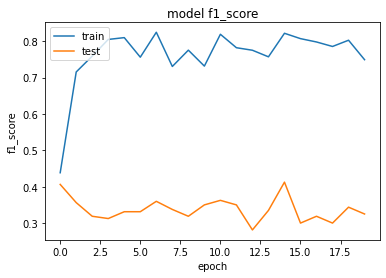

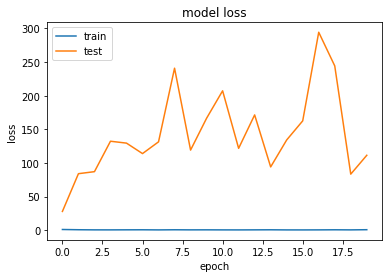

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**: